## Entsoe - Transparency Platform - Scarpping

* Test scrapping DE-LU data - day ahead prices

* date : 15.03.2022

In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date as f_date, datetime, timedelta
from requests import HTTPError

https://transparency.entsoe.eu/transmission-domain/r2/dayAheadPrices/show?name=&defaultValue=true&viewType=GRAPH&areaType=BZN&atch=false&dateTime.dateTime=15.03.2022+00:00|UTC|DAY&biddingZone.values=CTY|10Y1001A1001A83F!BZN|10Y1001A1001A82H&resolution.values=PT15M&resolution.values=PT30M&resolution.values=PT60M&dateTime.timezone=UTC&dateTime.timezone_input=UTC

In [2]:
url = 'https://transparency.entsoe.eu/transmission-domain/r2/dayAheadPrices/show?name=&defaultValue=true&viewType=GRAPH&areaType=BZN&atch=false&dateTime.dateTime=15.03.2022+00:00|UTC|DAY&biddingZone.values=CTY|10Y1001A1001A83F!BZN|10Y1001A1001A82H&resolution.values=PT15M&resolution.values=PT30M&resolution.values=PT60M&dateTime.timezone=UTC&dateTime.timezone_input=UTC'

In [3]:
date_test = '15.03.2022'
zone_test = 'DE-LU'

In [5]:
r = requests.get(url)

In [539]:
soup = BeautifulSoup(r.content,'html.parser')

In [540]:
soup


<!DOCTYPE html>

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="/resources/v_2.33.0-6171/images/icons/favicon.png" rel="icon" type="image/png"/>
<!--[if lte IE 9]>
    <meta http-equiv='cache-control' content='no-cache'>
    <meta http-equiv='expires' content='0'>
    <meta http-equiv='pragma' content='no-cache'>
    <![endif]-->
<title>Data view</title>
<!-- HTML5 correction scripts -->
<script src="/resources/v_2.33.0-6171/javascript/html5shiv/html5shiv.js" type="text/javascript"></script>
<script src="/resources/v_2.33.0-6171/javascript/html5shiv/html5shiv-printshiv.js" type="text/javascript"></script>
<!--  jQuery -->
<script src="/resources/v_2.33.0-6171/javascript/jquery/1.9/jquery.js" type="text/javascript"></script>
<script src="/resources/v_2.33.0-6171/javascript/jquery-ui/1.10/jquery-ui.js" type="text/javascript"></script>
<script src="/resources/v_2.33.0-6171/javascript/jquery.dataTables.js" type="text/javascript"></script>
<s

In [543]:
div_container = soup.find("div", {"id": "dv-data"})

In [43]:
data = div_container.find("script")

In [544]:
div_container

<div id="dv-data">
<script type="text/javascript">
	var chart = {"chartKeys":["val1"],"graphDesign":{"val1":{"title":"PT60M","serialChartType":"step","fillAlpha":0.0,"lineColor":"#c8c8c8","lineAlpha":5.0,"lineThickness":2,"bulletType":"none","bulletSize":6,"assignedAxis":"PRIMARY","stackType":"none","unit":""}},"chartsCount":1,"categoryName":"cat","chartDesign":{"title":"Day-ahead prices","showTitle":true,"titleFontSize":0,"showLegend":false,"animationDuration":0.0,"tooManyValues":false,"chartType":"serial","showXAxis":true,"showXAxisLabels":true,"xAxisTitle":"Time [Hours]","xAxisLabelRotation":0,"labelFrequency":1,"xAxisPosition":"bottom","showYAxis":true,"showYAxisLabels":true,"yAxisTitle":"Price per MTU [EUR / MWh]","showSecondaryYAxis":false,"showSecondaryYAxisLabels":true,"showWholeGraph":true,"showCursor":true,"cursorTextColor":"#000","cursorColor":"#FDC400","columnWidth":0.8,"columnSpacing":5,"showGraphTitles":true,"customBalloonValues":false,"axisAbsoluteValuesLabels":false,"au

In [74]:
#match = re.search('chart = (.+?);\n</script>', str(data))
data = div_container.find("script")
match = re.search(r'(?<="chartData":).*?(?=};)', str(data)).group(0)
result = pd.DataFrame(eval(match))
result = result.assign(datetime=pd.to_datetime(result['cat']),value=result['val1'].astype(float))
result = result.drop(labels=['cat', 'val1'], axis=1)

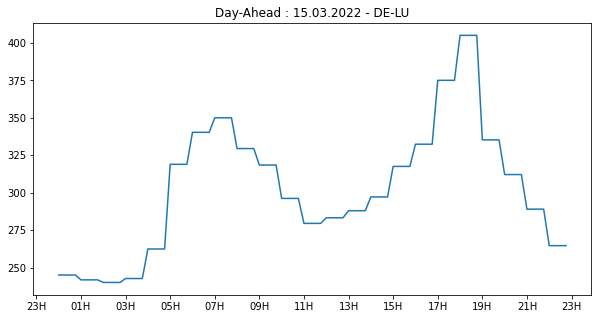

In [98]:
plt.figure(figsize=(10, 5))
plt.plot(result.datetime, result.value)
plt.title(f'Day-Ahead : {date_test} - {zone_test}')
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%HH'))

In [97]:
result.value.describe()

count     92.000000
mean     302.781739
std       42.888962
min      240.070000
25%      264.630000
50%      297.170000
75%      332.360000
max      405.020000
Name: value, dtype: float64

In [101]:
result[:20]

,datetime,value
0,2022-03-15 00:00:00,245.03
1,2022-03-15 00:15:00,245.03
2,2022-03-15 00:30:00,245.03
3,2022-03-15 00:45:00,245.03
4,2022-03-15 01:00:00,241.79
5,2022-03-15 01:15:00,241.79
6,2022-03-15 01:30:00,241.79
7,2022-03-15 01:45:00,241.79
8,2022-03-15 02:00:00,240.07
9,2022-03-15 02:15:00,240.07


In [102]:
result.tail()

,datetime,value
91,2022-03-15 22:45:00,264.63
92,2022-03-15 23:00:00,NaN
93,2022-03-15 23:15:00,NaN
94,2022-03-15 23:30:00,NaN
95,2022-03-15 23:45:00,NaN


### Generalisation 

https://transparency.entsoe.eu/transmission-domain/r2/dayAheadPrices/show?name=&defaultValue=true&viewType=GRAPH&areaType=BZN&atch=false&dateTime.dateTime=15.03.2022+00:00|UTC|DAY&biddingZone.values=CTY|10Y1001A1001A83F!BZN|10Y1001A1001A82H&resolution.values=PT15M&resolution.values=PT30M&resolution.values=PT60M&dateTime.timezone=UTC&dateTime.timezone_input=UTC

https://transparency.entsoe.eu/transmission-domain/r2/dayAheadPrices/show?name=&defaultValue=false&viewType=GRAPH&areaType=BZN&atch=false&dateTime.dateTime=16.03.2022+00:00|UTC|DAY&biddingZone.values=CTY|10Y1001A1001A83F!BZN|10Y1001A1001A82H&resolution.values=PT15M&resolution.values=PT30M&resolution.values=PT60M&dateTime.timezone=UTC&dateTime.timezone_input=UTC

>except requests.exceptions.HTTPError as errh:
    return "An Http Error occurred:" + repr(errh)
except requests.exceptions.ConnectionError as errc:
    return "An Error Connecting to the API occurred:" + repr(errc)
except requests.exceptions.Timeout as errt:
    return "A Timeout Error occurred:" + repr(errt)
except requests.exceptions.RequestException as err:
    return "An Unknown Error occurred" + repr(err)

In [148]:
template_url = "https://transparency.entsoe.eu/transmission-domain/r2/dayAheadPrices/show?name=&defaultValue=false&viewType=GRAPH&areaType=BZN&atch=false&dateTime.dateTime={}|UTC|DAY&biddingZone.values=CTY|10Y1001A1001A83F!BZN|10Y1001A1001A82H&resolution.values=PT15M&resolution.values=PT30M&resolution.values=PT60M&dateTime.timezone=UTC&dateTime.timezone_input=UTC"

In [4]:
import json

In [535]:
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

def daterange_2(start_date, n_days):
    for n in range(n_days):
        yield start_date + timedelta(n)
        
def date_to_string(date: datetime.date, format_date="%d.%m.%Y+00:00"):
    return date.strftime(format_date)
        
def form_url(date: datetime.date):
    return template_url.format(date_to_string(date))

def parse_html(response: str, date: str):
    
    result = pd.DataFrame()
    soup = BeautifulSoup(response.content,'html.parser')
    soup = soup.find("div", {"id": "dv-data"})
    data = soup.find("script")
    match = re.search(r'(?<="chartData":).*?(?=};)', str(data))
    return json.loads(match.group(0)) if match else np.nan

def scrap_price_from_date(date: datetime.date):
    """
    date : yyyy-mm-dd
    """
    url = form_url(date)
    try:
        #print(url)
        response = requests.get(url)
        #print(response.headers)
        response.raise_for_status()
    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')
    except Exception as err:
        print(f'Other error occurred: {err}')
    else:
        return parse_html(response, date)

def scrap_price_from_year(year: int):
    
    """
    default range = 1 year
    """
    
    start_date = f_date(year, 1, 1)
    end_date = f_date(year, 1, 3)
    daily_list = []
    for d_date in daterange(start_date, end_date):
        daily_list.append(dict(zip([date_to_string(d_date)], [scrap_price_from_date(d_date)])))
    #result = [_ for sub  in daily_list for _ in eval(sub) if _]
    result_df = (pd.DataFrame([_.values() for _ in daily_list], 
                              index=[next(iter(_.items()))[0] for _ in daily_list], 
                              columns=['value'])
                 .explode('value')
                )
    result_df = (result_df.value.apply(pd.Series)
                .reset_index().rename({'val1':'value', 'cat':'time', 'index':'day'}, axis=1))

    result_df['datetime'] = result_df[['day', 'time']].agg(lambda x: ''.join([x['day'][:-5],x['time']]), axis=1)
    if not result_df.empty :
        result_df = (result_df.assign(
                        datetime=pd.to_datetime(result_df['datetime'],format="%d.%m.%Y+%H:%M"),
                        value=result_df['value'].astype(float)
                        ).drop(labels=['time', 'day'], axis=1)
                 )
    
    return result_df
        
def get_available_electricity_price(year_start, year_end):
    pass

In [528]:
f_date(2021, 3, 1).strftime(format="%d.%m.%Y+00:00")

'01.03.2021+00:00'

In [558]:
t= '01.03.2021+00:00'
datetime.strptime(t, "%m.%d.%Y+%H:%M").year

2021

<AxesSubplot:xlabel='datetime'>

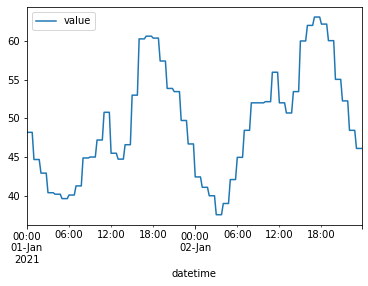

In [538]:
result.set_index('datetime').plot()

In [536]:
%%time
result = scrap_price_from_year(2021)

Wall time: 1.02 s


In [537]:
result

,value,datetime
0,48.19,2021-01-01 00:00:00
1,48.19,2021-01-01 00:15:00
2,48.19,2021-01-01 00:30:00
3,48.19,2021-01-01 00:45:00
4,44.68,2021-01-01 01:00:00
...,...,...
187,48.45,2021-01-02 22:45:00
188,46.11,2021-01-02 23:00:00
189,46.11,2021-01-02 23:15:00
190,46.11,2021-01-02 23:30:00


In [455]:
l = [{'01.01.2020+00:00': [{'cat': '00:00', 'val1': '38.60'}, {'cat': '00:15', 'val1': '38.60'}, {'cat': '00:30', 'val1': '38.60'}, {'cat': '00:45', 'val1': '38.60'}, {'cat': '01:00', 'val1': '36.55'}, {'cat': '01:15', 'val1': '36.55'}, {'cat': '01:30', 'val1': '36.55'}, {'cat': '01:45', 'val1': '36.55'}, {'cat': '02:00', 'val1': '32.32'}, {'cat': '02:15', 'val1': '32.32'}, {'cat': '02:30', 'val1': '32.32'}, {'cat': '02:45', 'val1': '32.32'}, {'cat': '03:00', 'val1': '30.85'}, {'cat': '03:15', 'val1': '30.85'}, {'cat': '03:30', 'val1': '30.85'}, {'cat': '03:45', 'val1': '30.85'}, {'cat': '04:00', 'val1': '30.14'}, {'cat': '04:15', 'val1': '30.14'}, {'cat': '04:30', 'val1': '30.14'}, {'cat': '04:45', 'val1': '30.14'}, {'cat': '05:00', 'val1': '30.17'}, {'cat': '05:15', 'val1': '30.17'}, 
                       {'cat': '05:30', 'val1': '30.17'}, {'cat': '05:45', 'val1': '30.17'}, {'cat': '06:00', 'val1': '30.00'}, {'cat': '06:15', 'val1': '30.00'}, {'cat': '06:30', 'val1': '30.00'}, {'cat': '06:45', 'val1': '30.00'}, {'cat': '07:00', 'val1': '30.65'}, {'cat': '07:15', 'val1': '30.65'}, {'cat': '07:30', 'val1': '30.65'}, {'cat': '07:45', 'val1': '30.65'}, {'cat': '08:00', 'val1': '30.65'}, {'cat': '08:15', 'val1': '30.65'}, {'cat': '08:30', 'val1': '30.65'}, {'cat': '08:45', 'val1': '30.65'}, {'cat': '09:00', 'val1': '30.27'}]}]

In [456]:
df = pd.DataFrame([x.values() for x in l], index=[list(x.keys()) for x in l], columns=['value']).explode('value')

df = df.value.apply(pd.Series).reset_index().rename({'val1':'value', 'cat':'date', 'level_0':'day'}, axis=1)

df['datetime'] = df[['day', 'date']].agg(lambda x: ''.join([x['day'][:-5],x['date']]), axis=1)

In [465]:
df

,day,date,value,datetime
0,01.01.2020+00:00,00:00,38.60,01.01.2020+00:00
1,01.01.2020+00:00,00:15,38.60,01.01.2020+00:15
2,01.01.2020+00:00,00:30,38.60,01.01.2020+00:30
3,01.01.2020+00:00,00:45,38.60,01.01.2020+00:45
4,01.01.2020+00:00,01:00,36.55,01.01.2020+01:00
5,01.01.2020+00:00,01:15,36.55,01.01.2020+01:15
6,01.01.2020+00:00,01:30,36.55,01.01.2020+01:30
7,01.01.2020+00:00,01:45,36.55,01.01.2020+01:45
8,01.01.2020+00:00,02:00,32.32,01.01.2020+02:00
9,01.01.2020+00:00,02:15,32.32,01.01.2020+02:15


In [ ]:
['+'.join([d_date, _]) for d_dict in daily_list for k, v in d_dict.items()]

In [360]:
l = [[{"cat":"23:30","val1":"35.40"},{"cat":"23:45","val1":"35.40"}, {"cat":"23:30","val1":"35.40"},{"cat":"23:45","val1":"35.40"}, {"cat":"23:30","val1":"35.40"},{"cat":"23:45","val1":"35.40"}]]

In [361]:
pd.DataFrame(l)

,cat,val1
0,23:30,35.40
1,23:45,35.40
2,23:30,35.40
3,23:45,35.40
4,23:30,35.40
5,23:45,35.40


### Json to dataFrame

In [5]:
import glob
import os
import json

In [625]:
from pathlib import Path

In [6]:
pwd

'C:\\Users\\marti\\Documents\\Code\\Rhizome'

In [119]:
path_data = "C:/Users/marti/Documents/Code/electricity_scraping/Data/2019"

In [120]:
def open_json(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)

In [121]:
daily_list = []
for file_path in glob.glob(os.path.join(path_data, '*.json')):
    daily_list.append(dict(zip([file_path[len(file_path)-13:-5]], [open_json(file_path)])))

In [122]:
result_df = (pd.DataFrame([_.values() for _ in daily_list], 
                          index=[next(iter(_.items()))[0] for _ in daily_list], 
                          columns=['value'])
             .explode('value')
            )
result_df = (result_df.value.apply(pd.Series)
            .reset_index().rename({'val1':'value', 'cat':'time', 'index':'day'}, axis=1))

In [123]:
if not result_df.empty :
    result_df = (result_df.assign(
                    datetime=pd.to_datetime(result_df['day']+result_df['time'], format="%m%d%Y%H:%M"),
                    value=result_df['value'].astype(float)
                    ).drop(labels=['time', 'day'], axis=1)
             )

In [124]:
result_df.head()

,value,datetime
0,10.07,2019-01-01 00:00:00
1,10.07,2019-01-01 00:15:00
2,10.07,2019-01-01 00:30:00
3,10.07,2019-01-01 00:45:00
4,-4.08,2019-01-01 01:00:00


In [125]:
assert len(result_df)/365/4 == 24.0

In [126]:
def format_df(df):
    index = simulate_hour_index(df)
    df = df.iloc[index]
    df = df.reset_index(drop=True)
    df = _format_df_v0(df)
    return df[['date', 'Hours', 'value']]

In [127]:
def simulate_hour_index(df):
    index = []
    for i in range(0, len(df), 4):
        index.append(i)
    return index

In [128]:
def _format_df_v0(df):
    df['Hours'] = df.datetime.dt.strftime('%H')
    df['Hours_end'] = (pd.to_datetime(df['Hours'], format="%H") + timedelta(hours=1)).dt.strftime('%H')
    df['Hours'] = df.apply(lambda x: ' - '.join((x['Hours'], x['Hours_end'])),axis=1)
    df['date'] = df['datetime'].dt.strftime('%d/%m/%Y')
    df = df.drop(['Hours_end', 'datetime'], axis=1)
    return df

In [129]:
result_df = format_df(result_df)

In [130]:
result_df

,date,Hours,value
0,01/01/2019,00 - 01,10.07
1,01/01/2019,01 - 02,-4.08
2,01/01/2019,02 - 03,-9.91
3,01/01/2019,03 - 04,-7.41
4,01/01/2019,04 - 05,-12.55
...,...,...,...
8755,31/12/2019,19 - 20,42.20
8756,31/12/2019,20 - 21,39.74
8757,31/12/2019,21 - 22,38.88
8758,31/12/2019,22 - 23,37.39


In [131]:
year = pd.to_datetime(result_df.date.iloc[0]).year

In [132]:
year

2019

In [133]:
import sys  
!{sys.executable} -m pip install openpyxl
import openpyxl

In [134]:
result_df.to_excel(f'Data_processed/BZN-DE-LU/Day_ahead_{year}_DE_LU.xlsx', index=False)

In [679]:
index = simulate_hour_index(result_df)

In [683]:
result_df = result_df.iloc[index]

result_df = result_df.reset_index(drop=True)

In [742]:
result_df['Hours'] = result_df.datetime.dt.strftime('%H')
result_df['Hours_end'] = (pd.to_datetime(result_df['Hours'], format="%H") + timedelta(hours=1)).dt.strftime('%H')
result_df['Hours'] = result_df.apply(lambda x: ' - '.join((x['Hours'], x['Hours_end'])),axis=1)
result_df = result_df.drop(['Hours_end', 'datetime'], axis=1)

In [715]:
df = result_df.copy()

In [732]:
df['Hours'] = df.datetime.dt.strftime('%H')

In [733]:
timedelta(hours=1)

datetime.timedelta(seconds=3600)

In [734]:
(pd.to_datetime(df['Hours'], format="%H") + timedelta(hours=1)).dt.strftime('%H')

0       01
1       02
2       03
3       04
4       05
        ..
8755    20
8756    21
8757    22
8758    23
8759    00
Name: Hours, Length: 8760, dtype: object

In [736]:
df['Hours_end'] = (pd.to_datetime(df['Hours'], format="%H") + timedelta(hours=1)).dt.strftime('%H')

In [739]:
df['Hours'] = df.apply(lambda x: ' - '.join((x['Hours'], x['Hours_end'])),axis=1)

In [714]:
result_df[(result_df.datetime.dt.month == 1) & (result_df.datetime.dt.day == 31)]

,value,datetime,date
720,40.98,2021-01-31 00:00:00,31/01/2021
721,40.51,2021-01-31 01:00:00,31/01/2021
722,39.50,2021-01-31 02:00:00,31/01/2021
723,38.61,2021-01-31 03:00:00,31/01/2021
724,40.41,2021-01-31 04:00:00,31/01/2021
725,40.37,2021-01-31 05:00:00,31/01/2021
726,41.29,2021-01-31 06:00:00,31/01/2021
727,44.85,2021-01-31 07:00:00,31/01/2021
728,49.15,2021-01-31 08:00:00,31/01/2021
729,50.73,2021-01-31 09:00:00,31/01/2021


In [708]:
result_df[result_df.datetime.dt.month == 12]

,value,datetime
8016,107.00,2021-12-01 00:00:00
8017,97.39,2021-12-01 01:00:00
8018,93.97,2021-12-01 02:00:00
8019,86.86,2021-12-01 03:00:00
8020,94.27,2021-12-01 04:00:00
...,...,...
8755,0.18,2021-12-31 19:00:00
8756,0.08,2021-12-31 20:00:00
8757,5.10,2021-12-31 21:00:00
8758,6.32,2021-12-31 22:00:00


In [703]:
result_df.isna().sum()

value       0
datetime    0
dtype: int64

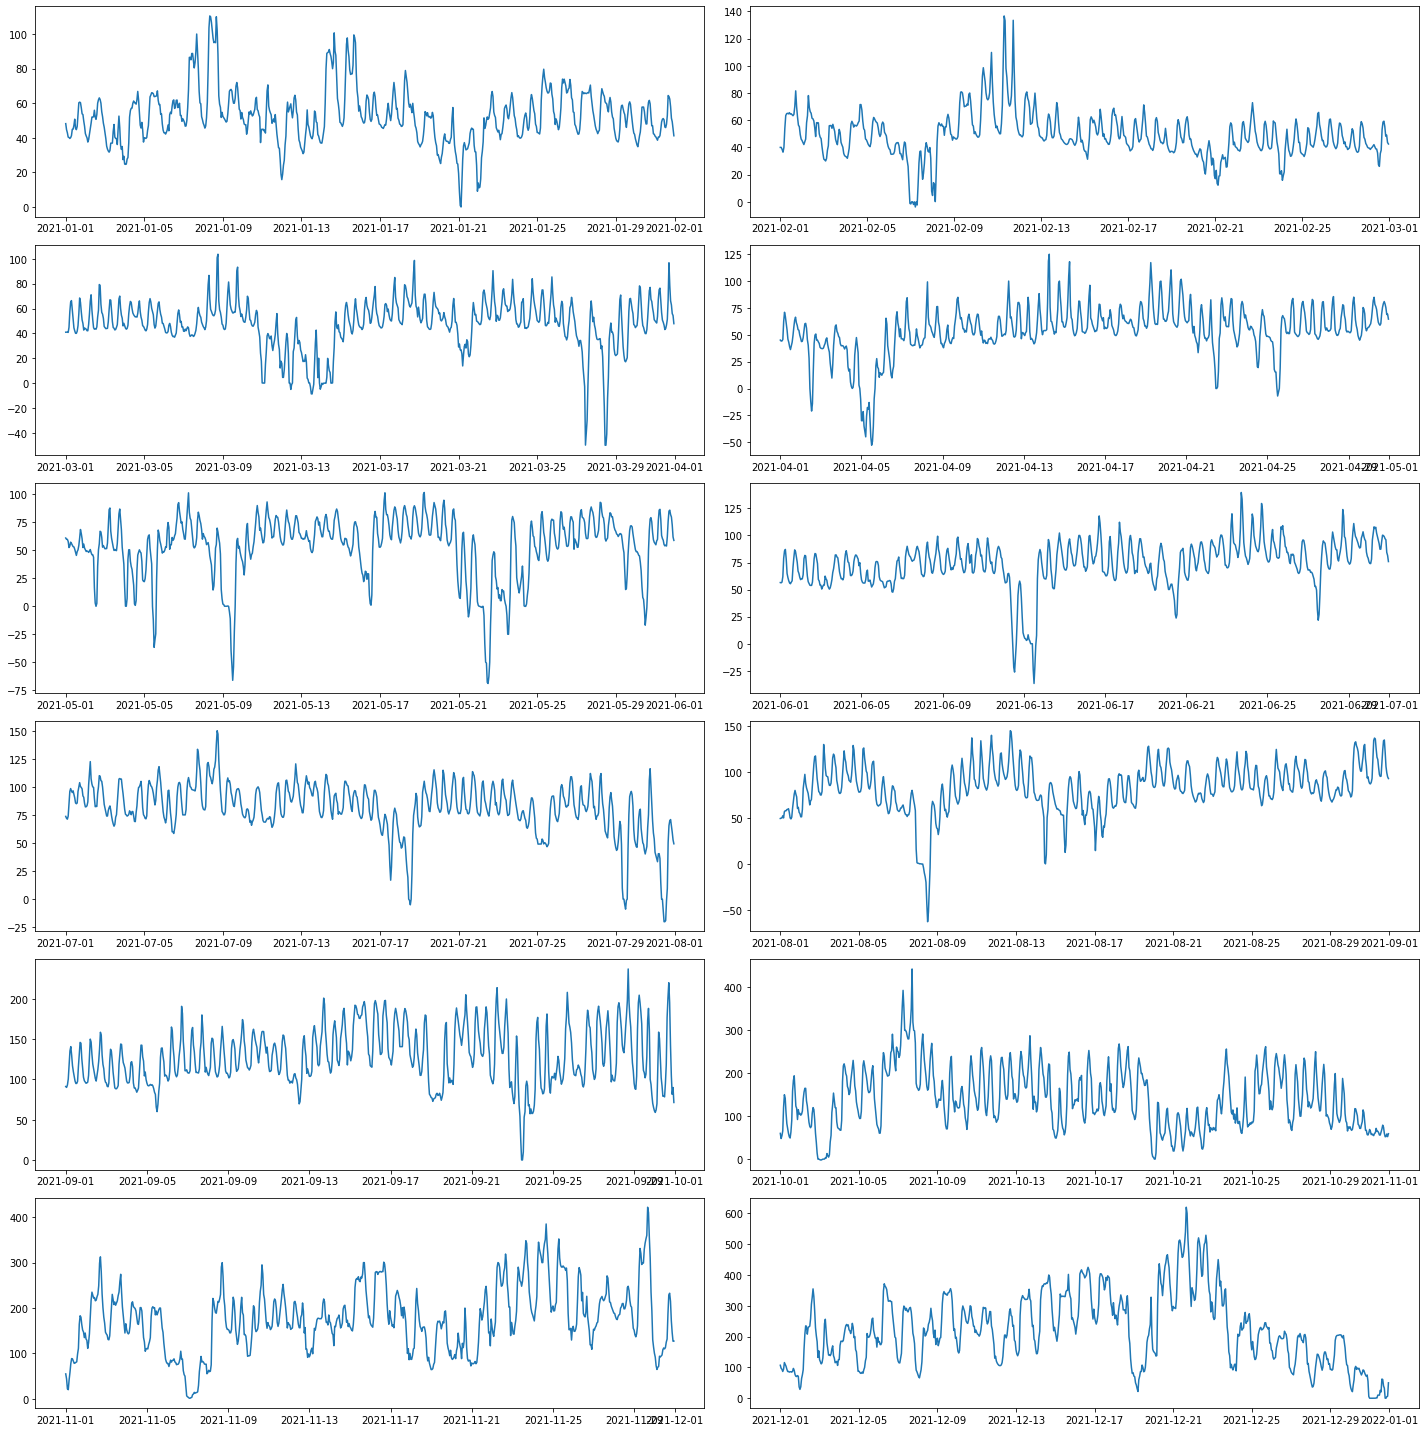

In [709]:
fig, axes = plt.subplots(6, 2, figsize=(20, 20))
axes = axes.ravel()
for i in range(12):
    axes[i].plot(result_df[result_df.datetime.dt.month == i+1].datetime, result_df[result_df.datetime.dt.month == i+1].value)
    axes[i]
fig.tight_layout()